# EGD103 Lecture 8 of 9 - Markdown, NumPy, MatPlotLib

## Assignment Tips / Q & A

In [2]:
# correlations and linear relationships
import pandas as pd
weather = pd.read_csv('Data/BrisbaneDailyWeather.csv', index_col='Date', parse_dates=True)
weather

,MinTemp,MaxTemp,Rainfall
Date,,,
2022-02-13,18.6,29.3,7.2
2022-02-12,20.4,28.9,0.0
2022-02-11,19.1,31.3,0.0
2022-02-10,19.4,31.2,0.0
2022-02-09,18.6,30.0,0.0
...,...,...,...
1999-12-15,17.0,27.0,0.0
1999-12-14,17.0,26.0,0.2
1999-12-13,19.0,24.0,0.8


In [3]:
# correlation
weather.corr()

,MinTemp,MaxTemp,Rainfall
MinTemp,1.000000,0.743777,0.152545
MaxTemp,0.743777,1.000000,-0.014784
Rainfall,0.152545,-0.014784,1.000000


<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

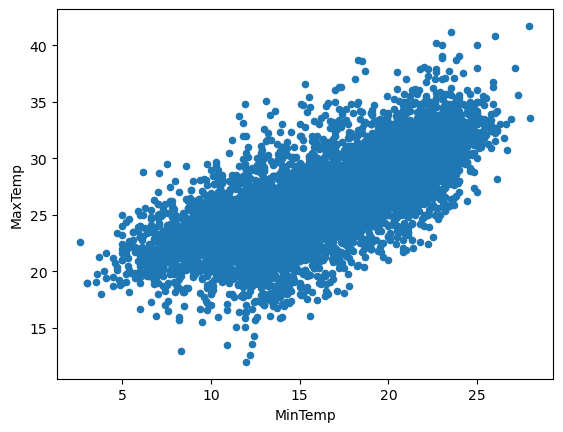

In [4]:
# highest correlation is between min and max temps (0.7438)
weather.plot(x='MinTemp', y='MaxTemp', kind='scatter')

In [7]:
# can only get correlation with numeric data - set numeric_only to True if you have non-numeric columns
pollution = pd.read_csv('LSTM-Multivariate_pollution.csv')
pollution.corr(numeric_only=True)

,pollution,dew,temp,press,wnd_spd,snow,rain
pollution,1.000000,0.157585,-0.090798,-0.045544,-0.234362,0.022226,-0.049045
dew,0.157585,1.000000,0.824432,-0.778737,-0.296720,-0.034484,0.125053
temp,-0.090798,0.824432,1.000000,-0.827205,-0.154902,-0.092726,0.049037
press,-0.045544,-0.778737,-0.827205,1.000000,0.185380,0.069031,-0.079840
wnd_spd,-0.234362,-0.296720,-0.154902,0.185380,1.000000,0.021876,-0.010137
snow,0.022226,-0.034484,-0.092726,0.069031,0.021876,1.000000,-0.009553
rain,-0.049045,0.125053,0.049037,-0.079840,-0.010137,-0.009553,1.000000


<Axes: title={'center': 'Relationship between temperature and pressure from ...'}, xlabel='Temperature', ylabel='Pressure'>

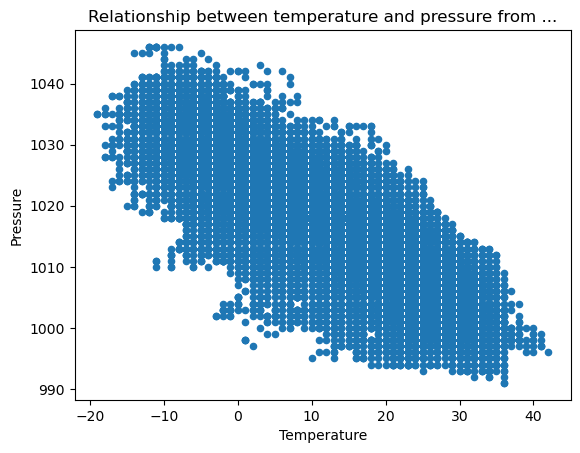

In [9]:
# temp and press have the highest correlation
pollution.plot(x='temp', y='press', kind='scatter',
              xlabel='Temperature',
              ylabel='Pressure',
              title='Relationship between temperature and pressure from ...')

## Markdown
Markdown is a programming language used to create formatted text. JupyterLab notebooks allow you to write Markdown code by adding a Markdown cell.

The official website contains some useful learning resources:
* Basic syntax: https://www.markdownguide.org/basic-syntax/
* Cheat sheet: https://www.markdownguide.org/cheat-sheet/

You can also learn by example by clicking on any Markdown cells in notebooks provided to you over the course of the semester.

# Heading font
## Subheading
### Subsubheading

* bullet
* point
* list
* example

1. numbered
2. list
3. example

Can create tables, add figures etc.

Table example:
| Syntax | Description |
| ----------- | ----------- |
| Header | Title |
| Paragraph | Text |

## NumPy

NumPy is the most commonly used Python library for numeric computing. While the math module from week 1 allows us to use Python as a scientific calculator, the numpy library will allow math capabilities far surpassing a graphics calculator. Official documentation can be found here: https://numpy.org/doc/stable/.

In [10]:
# importing numpy
import numpy as np

### Creating NumPy Arrays
NumPy gives us access to a new data type: the array. Arrays are similar to lists, but differ in important ways:
* Arrays can be multidimensional. A 1D array is similar to a list, but we can also create 2D, 3D, nD arrays.
* All elements of an array must have the same data type.
* Arrays include lots of mathematical functionality (eg. operators, functions, methods) which isn't the case for lists.

You can convert a list to an array with the <code>array</code> function in NumPy. There are also other functions available to quickly create common arrays such as <code>arange</code>, <code>linspace</code>, <code>ones</code> and <code>zeros</code>.

In [11]:
# examples
array_example = np.array([1, 2, 3, 4, 5])
array_example

array([1, 2, 3, 4, 5])

In [12]:
# matrix example
matrix = np.array([[1, 2, 3],
                  [4, 5, 6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

Once you have created an array, you can inspect its properties through its attributes. Attributes are values that are defined within a data type. You access them similarly to methods, except you do not call them (ie. no brackets). You can generally think of an attribute as a fact about the object whereas a method involves doing something to the object.

```python
value.attribute_name
```

Some useful attributes of arrays include <code>ndim</code>, <code>shape</code>, <code>size</code>, and <code>dtype</code>.

In [16]:
# examples
matrix.dtype

dtype('int64')

### Basic Functionality
NumPy supports elementwise operations, functions and indexing, avoiding the need for loops! An element-wise process is one that "does something" for each element. This allows you to more easily and efficiently perform calculations with collections of values than you could with Python's in-built data structures (lists, tuples, etc.).

NumPy arrays can be indexed and sliced like lists. In addition to slicing, it will allow for a sequence of indexes to be provided to select a subset of an array, meaning you can select any subset and not just adjacent elements. Further functionality is also available for higher dimensional arrays, since arrays understand the concept of dimensionality. For example, in a matrix you could index with:
```{python}
matrix_name[row_index, col_index]

In [17]:
# arrays support elementwise operations, functions
matrix + 5

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [18]:
import math
math.sin(array_example)

TypeError: only length-1 arrays can be converted to Python scalars

In [19]:
np.sin(array_example)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

In [20]:
matrix > 3

array([[False, False, False],
       [ True,  True,  True]])

In [21]:
# use index (position) for selection
array_example[0]

np.int64(1)

In [22]:
# can provide multiple indexes for higher dimensional arrays
matrix[0, 1]

np.int64(2)

In [23]:
# have slicing support like lists have
matrix[:, 1]

array([2, 5])

In [24]:
# have vector indexing support like pandas
matrix[0, [0, 2]]

array([1, 3])

### Mathematics with NumPy
NumPy has functionality to support more advanced mathematics beyond the math module. Linear algebra (vector, matrix) functionality is particularly useful here.

In [25]:
# examples
matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [26]:
matrix @ matrix.transpose()

array([[14, 32],
       [32, 77]])

In [27]:
A = matrix
A

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
b = np.array([4, 3, 1])

## Plotting with MatPlotLib
MatPlotLib is the most common library used to visualise numeric data in Python, and is commonly used in tandem with NumPy. Documentation can be found here: https://matplotlib.org/stable/index.html.

MatPlotLib is a lower-level plotting tool that the pandas plot method. This means you need to provide more instruction when creating a plot - features pandas automates such as labels and legends need to be explicitly programmed with MatPlotLib. Being lower level allows for more customisation than is possible with pandas plotting.

In [29]:
# matplotlib import
import matplotlib.pyplot as plt

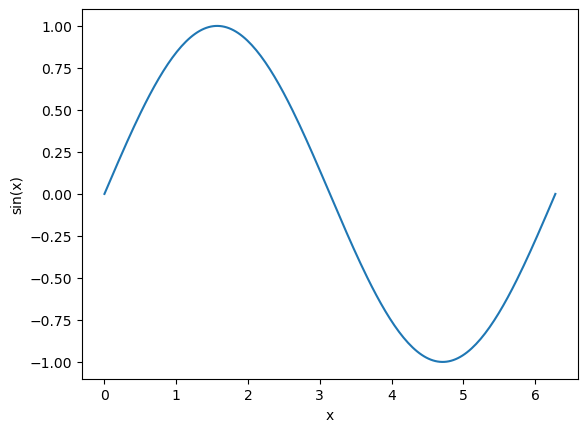

In [37]:
# example - provided in MatPlotLib documentation
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
plt.show()

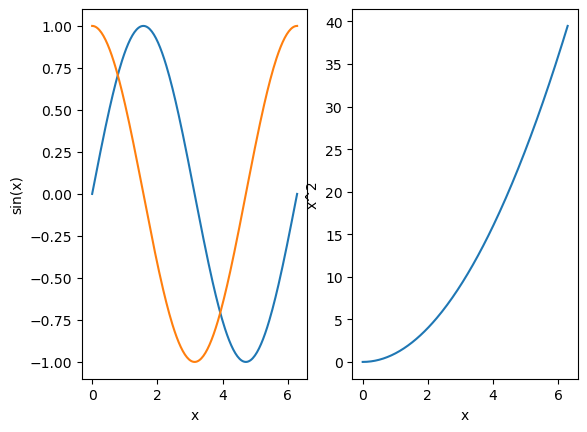

In [47]:
# example - provided in MatPlotLib documentation
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('sin(x)')

y2 = np.cos(x)
ax[0].plot(x, y2)

y3 = x**2
ax[1].plot(x, y3)
ax[1].set_xlabel('x')
ax[1].set_ylabel('x^2')


plt.show()